In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from fancyimpute import IterativeImputer, KNN

In [7]:
# Load the dataset
path = '/workspaces/bakery_sales_prediction/0_DataPreparation/07_Wetter/wetter.csv'
data = pd.read_csv(path)

data

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0
...,...,...,...,...,...
2596,2019-07-28,3.0,23.3500,14,5.0
2597,2019-07-29,6.0,25.2500,7,61.0
2598,2019-07-30,7.0,20.7375,8,61.0
2599,2019-07-31,6.0,20.4500,7,61.0


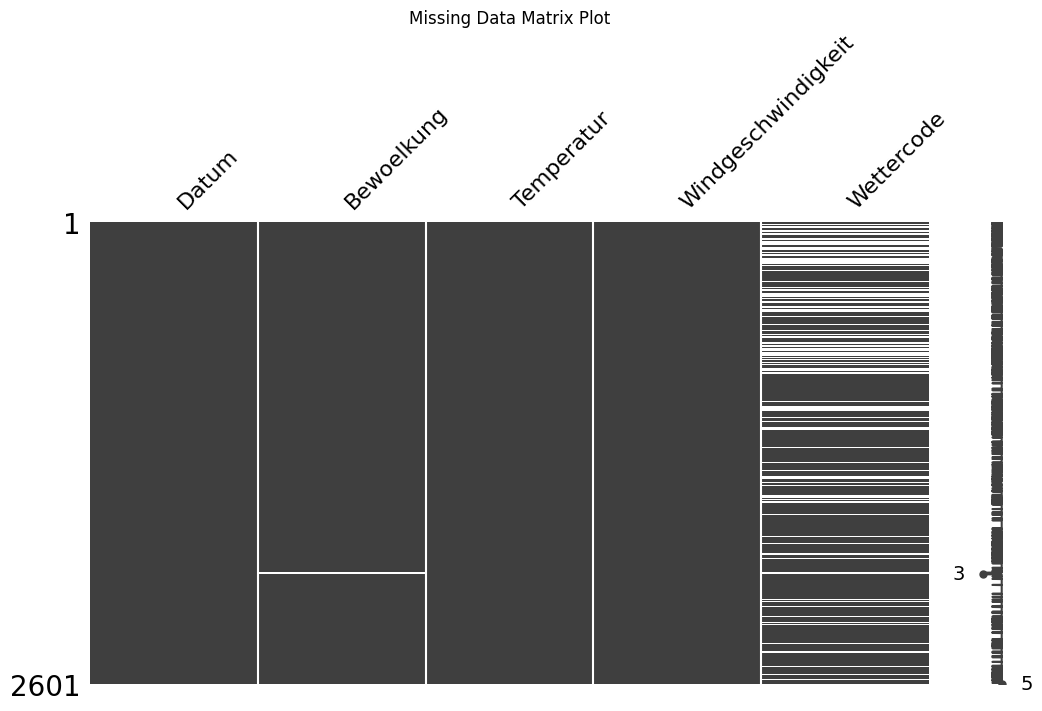

In [9]:
# Matrix plot of missing data
msno.matrix(data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

In [11]:
# Create a mask for the imputed values
mask = data['Bewoelkung'].isna()  # mask for missing values in 'Ozone'

In [14]:
# KNN imputation
imputer_knn = KNN()
bewoelkung_knn = pd.DataFrame(imputer_knn.fit_transform(data['Bewoelkung']), columns=data.columns)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [15]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

NameError: name 'airquality' is not defined

In [16]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

In [17]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality, airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

NameError: name 'airquality' is not defined

In [ ]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

In [ ]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))